In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#data quick summary function

def df_quick_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Unique Sample', 'Missing Values', 'Missing Percentage', 'Unique Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        unique_sample = df[column].unique()[:5]
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        unique_percentage = (df[column].nunique() / len(df)) * 100
        report = pd.concat([report, pd.DataFrame({'Column': [column],
                                                      'Data Type': [data_type],
                                                      'Unique Count': [unique_count],
                                                      'Unique Sample': [unique_sample],
                                                      'Missing Values': [missing_values],
                                                      'Missing Percentage': [missing_percentage.round(4)],
                                                      'Unique Percentage': [unique_percentage]})],
                            ignore_index=True)
    return report

In [3]:
df = pd.read_excel('datasets/Online Retail Data Set.xlsx', sheet_name='Online Retail')

In [4]:
display(df.head(5))
print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)


In [5]:
df_quick_info(df)

,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,InvoiceNo,object,25900,"[536365, 536366, 536367, 536368, 536369]",0,0.0000,4.779400
1,StockCode,object,4070,"[85123A, 71053, 84406B, 84029G, 84029E]",0,0.0000,0.751049
2,Description,object,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",1454,0.2683,0.779282
3,Quantity,int64,722,"[6, 8, 2, 32, 3]",0,0.0000,0.133233
4,InvoiceDate,datetime64[ns],23260,"[2010-12-01T08:26:00.000000000, 2010-12-01T08:...",0,0.0000,4.292234
5,UnitPrice,float64,1630,"[2.55, 3.39, 2.75, 7.65, 4.25]",0,0.0000,0.300789
6,CustomerID,float64,4372,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0]",135080,24.9267,0.806778
7,Country,object,38,"[United Kingdom, France, Australia, Netherland...",0,0.0000,0.007012


In [6]:
filtered_df = df[
    ~(
        df['Description'].isna() |
        df['Description'].apply(lambda x: 'wrong' in str(x).lower() or 'damage' in str(x).lower() or 'crushed' in str(x).lower() or '?' in str(x).lower()))
]

items = pd.DataFrame(filtered_df.groupby('StockCode')['Description'].apply(lambda x: x.astype('str').max())).reset_index()

items['Description'] = items.Description.replace('nan', pd.NA)

df = df.merge(items, on='StockCode', how = 'left')



In [7]:
for i in set(df.query('Description_x.isna()').Description_y):
    print(i)

GINGHAM OVEN GLOVE RED HEART 
RED TEA TOWEL CLASSIC DESIGN
CROCHET ROSE DES CLOTHES HANGER
METAL SIGN,CUPCAKE SINGLE HOOK
LARGE WHITE/PINK ROSE ART FLOWER
LIGHT PINK FLOCK GLASS CANDLEHOLDER
PINK OVAL JEWELLED MIRROR
BLACK/WHITE GLASS/SILVER BRACELET
RED DAISY PAPER LAMPSHADE
mix up with c
PINK FELT HANGING HEART W FLOWER
POTTING SHED SEED ENVELOPES
HEART T-LIGHT HOLDER
ASSTD DESIGN BUBBLE GUM RING
SET/3 TALL GLASS CANDLE HOLDER PINK
POLKADOT COFFEE CUP & SAUCER PINK
CARDHOLDER GINGHAM CHRISTMAS TREE
WHITE AND BLUE CERAMIC OIL BURNER
EASTER BUNNY WREATH
SALLE DE BAIN HOOK
SHOE SHINE BOX 
label mix up
ORIGAMI ROSE INCENSE IN TUBE
SOAP DISH BROCANTE
re dotcom quick fix.
GIRLY PINK TOOL SET
SQUARE CHERRY BLOSSOM CABINET
LARGE ROUND CUTGLASS CANDLESTICK
WHITE MURANO TWIST BRACELET
RECIPE BOX BLUE SKETCHBOOK DESIGN
PENNY FARTHING BIRTHDAY CARD
BLUE SHARK HELICOPTER
ZINC FINISH 15CM PLANTER POTS
Dotcomgiftshop Gift Voucher £10.00
VINTAGE SHELLS PRINT
VINTAGE BLUE KITCHEN CABINET
DOVE DECORAT

In [8]:
def clean_descr(row):
    orig = row['Description_x']
    clean = row['Description_y']
    if pd.isna(orig):
        return clean
    else:
        return orig
df['Description'] = df.apply(clean_descr, axis=1)

df = df.drop(columns=['Description_x','Description_y'])

In [9]:
customers = pd.DataFrame(df[~df['CustomerID'].isna()].groupby('InvoiceNo')['CustomerID'].max()).reset_index()

customers['CustomerID'] = customers.CustomerID.replace('nan', pd.NA)

df = df.merge(customers, on='InvoiceNo', how = 'left')

In [10]:
def clean_cust(row):
    orig = row['CustomerID_x']
    clean = row['CustomerID_y']
    if pd.isna(orig):
        return clean
    else:
        return orig
df['CustomerID'] = df.apply(clean_cust, axis=1)

df = df.drop(columns=['CustomerID_x','CustomerID_y'])

In [11]:
df_quick_info(df)

,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,InvoiceNo,object,25900,"[536365, 536366, 536367, 536368, 536369]",0,0.0000,4.779400
1,StockCode,object,4070,"[85123A, 71053, 84406B, 84029G, 84029E]",0,0.0000,0.751049
2,Quantity,int64,722,"[6, 8, 2, 32, 3]",0,0.0000,0.133233
3,InvoiceDate,datetime64[ns],23260,"[2010-12-01T08:26:00.000000000, 2010-12-01T08:...",0,0.0000,4.292234
4,UnitPrice,float64,1630,"[2.55, 3.39, 2.75, 7.65, 4.25]",0,0.0000,0.300789
5,Country,object,38,"[United Kingdom, France, Australia, Netherland...",0,0.0000,0.007012
6,Description,object,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",112,0.0207,0.779282
7,CustomerID,float64,4372,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0]",135080,24.9267,0.806778


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df['Revenue'] = df.Quantity*df.UnitPrice

In [14]:
numeric_cols  = [var for var in df.select_dtypes(include='number')]

numeric_cols

['Quantity', 'UnitPrice', 'CustomerID', 'Revenue']

In [15]:
#creating Region

mapping = {
    'Norway':'Europe',
    'Germany':'Europe',
    'Sweden':'Europe',
    'France':'Europe',
    'Unspecified':pd.NA,
    'RSA':'Africa',
    'Canada':'North America',
    'Lebanon':'Asia',
    'Lithuania':'Europe',
    'Netherlands':'Europe',
    'Austria':'Europe',
    'European Community':'Europe',
    'Iceland':'Europe',
    'Cyprus':'Europe',
    'Singapore':'Asia',
    'Finland':'Europe',
    'United Kingdom':'Europe',
    'Spain':'Europe',
    'Poland':'Europe',
    'Denmark':'Europe',
    'Italy':'Europe',
    'Israel':'Asia',
    'Bahrain':'Asia',
    'Channel Islands':'Europe',
    'Belgium':'Europe',
    'Brazil':'South America',
    'Hong Kong':'Asia',
    'Japan':'Asia',
    'Australia':'Australia',
    'United Arab Emirates':'Asia',
    'Switzerland':'Europe',
    'Portugal':'Europe',
    'Malta':'Europe',
    'Czech Republic':'Europe',
    'Greece':'Europe',
    'EIRE':'Europe',
    'USA':'North America',
    'Saudi Arabia':'Asia'
}
df['Region'] = df.Country.apply(lambda x: mapping[x])

# Numeric Features

<Axes: >

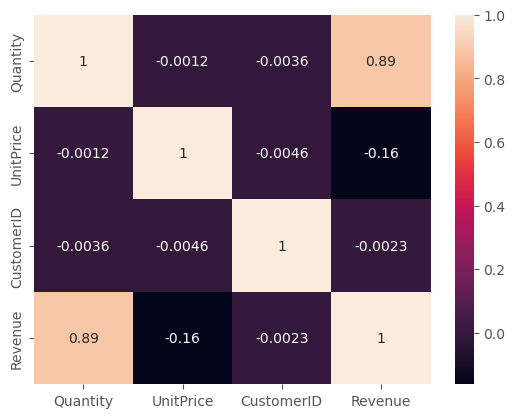

In [16]:
#correlation 
sns.heatmap(df[numeric_cols].corr(), annot=True)

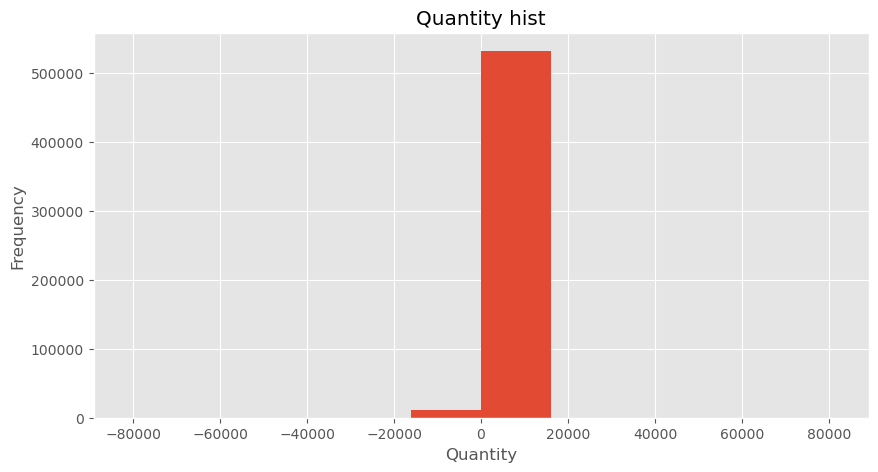

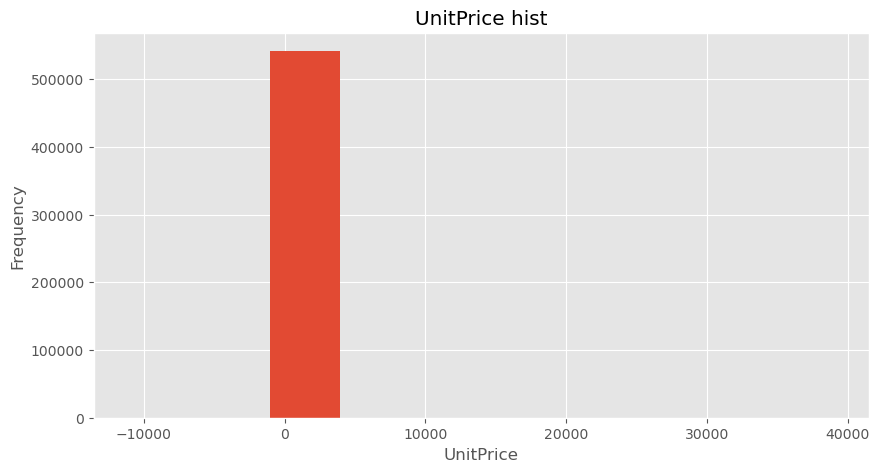

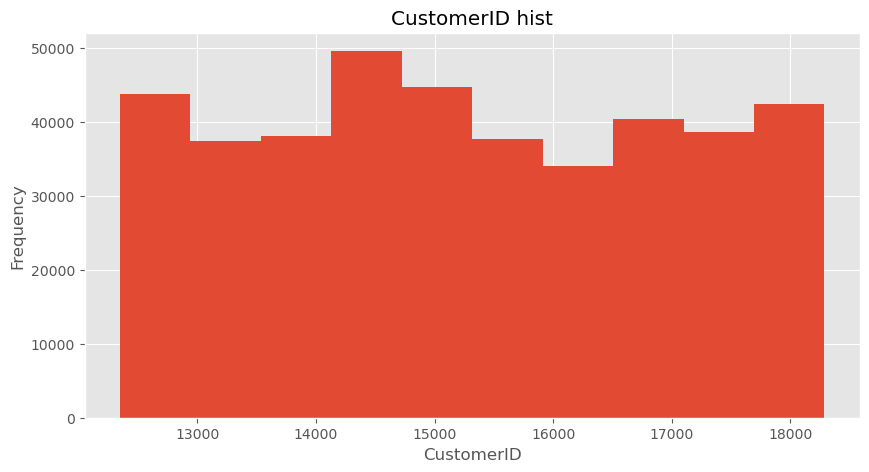

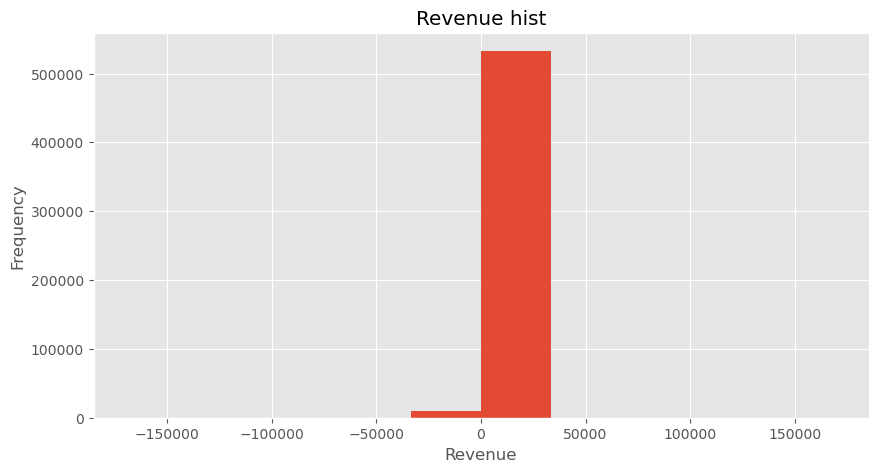

In [17]:
#distribution of numeric cols
for col in numeric_cols:
    ax = df[col].plot(kind='hist',
    figsize=(10,5))
    ax.set_xlabel(col)
    plt.title(col + ' hist')
    plt.show()

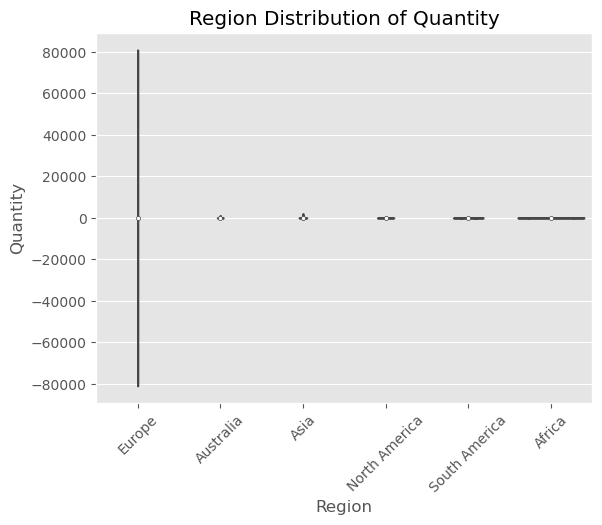

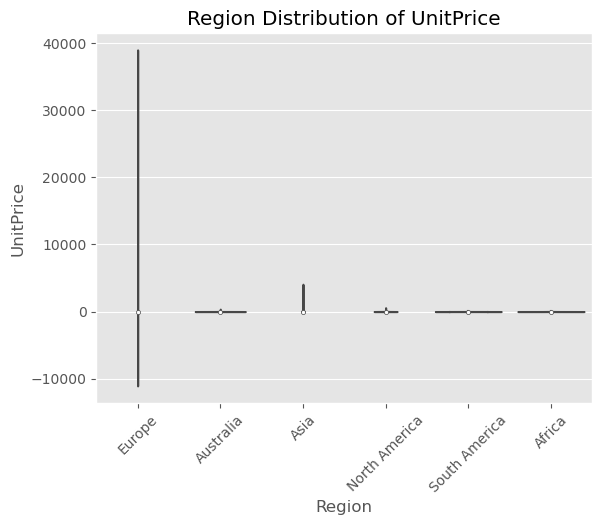

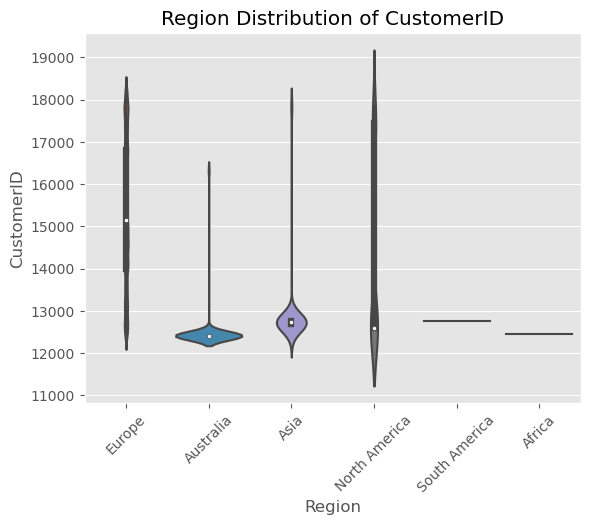

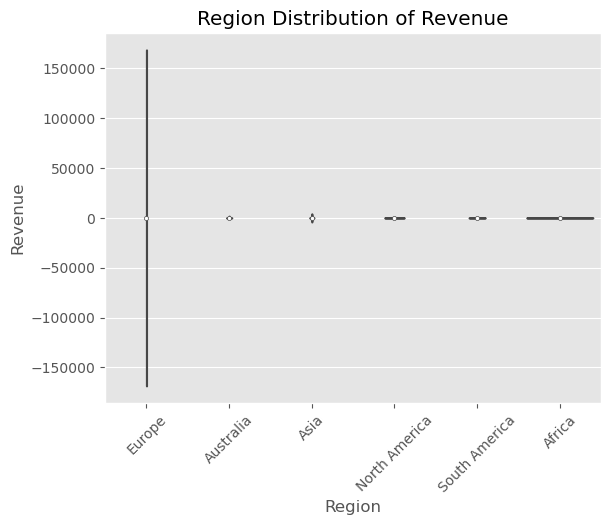

In [18]:
#distribution by Country

for i in numeric_cols:
    sns.violinplot(x='Region', y = i, data = df)
    plt.xticks(rotation=45)
    plt.title('Region Distribution of '+i)
    plt.show()

count    3663.000000
mean        2.936739
std         2.313861
min         0.290000
25%         1.238963
50%         2.251860
75%         3.967239
max        10.364535
Name: UnitPrice, dtype: float64

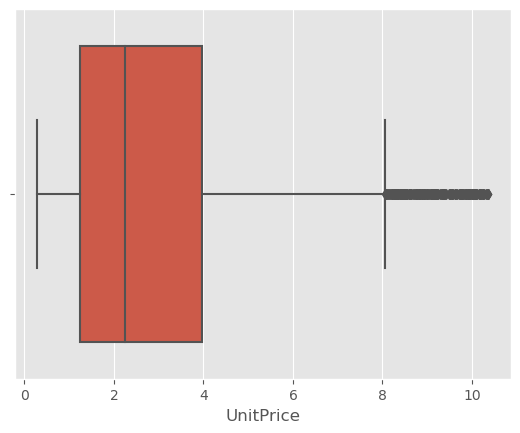

In [19]:
#defining category based on price level
avg_prices = pd.DataFrame(df.query('UnitPrice >= 0').groupby('StockCode').agg({'UnitPrice':'mean'}).reset_index())
quant_5 = avg_prices.UnitPrice.quantile(0.05)
quant_95 = avg_prices.UnitPrice.quantile(0.95)
filtered_avg_prices = avg_prices[(avg_prices.UnitPrice >= quant_5) & (avg_prices.UnitPrice <= quant_95)]
display(filtered_avg_prices.UnitPrice.describe())
sns.boxplot(x=filtered_avg_prices.UnitPrice)
plt.show()

In [20]:
# categorize the items in 3 categories

def categorize_price(x):
    if x <3.3:
        return 'lower'
    elif 3.3 <= x < 6.6:
        return 'medium'
    elif x>=6.6:
        return 'higher'
    else:
        'not profitable'

In [21]:
avg_prices['price_category'] = avg_prices.UnitPrice.apply(categorize_price)

avg_prices.sample(5)

,StockCode,UnitPrice,price_category
2549,72130,0.743214,lower
485,21375,8.153793,higher
2512,47469,0.638500,lower
219,20963,1.820558,lower
1806,22981,1.858739,lower


In [22]:
df = df.merge(avg_prices[['StockCode', 'price_category']], on='StockCode', how='left')

count      3908.000000
mean       2577.577764
std        7142.159571
min           0.003000
25%         128.130000
50%         674.195000
75%        2193.255000
max      206245.480000
Name: Revenue, dtype: float64

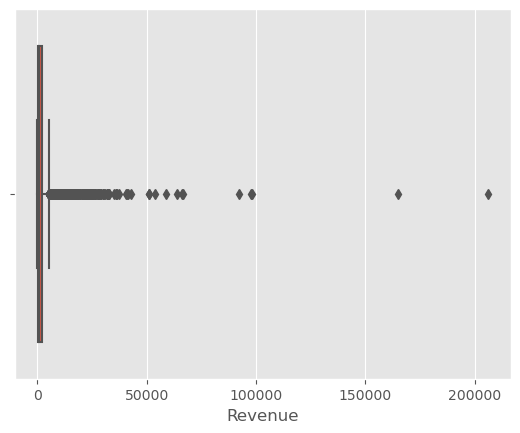

In [23]:
#defining category based on sold volume
item_revenue = pd.DataFrame(df.groupby('StockCode').agg({'Revenue':'sum'}).reset_index()).sort_values('Revenue', ascending=True).query('Revenue>0')
item_revenue['Cummulative%'] = np.arange(1, len(item_revenue) + 1) / len(item_revenue)
display(item_revenue.Revenue.describe())
sns.boxplot(x=item_revenue.Revenue)
plt.show()

In [24]:
# categorize the items in 3 categories

def categorize_revenue(x):
    if x >=0.8:
        return 'A'
    elif 0.5 <= x < 0.8:
        return 'B'
    elif x < 0.5:
        return 'C'
    else:
        'not profitable'

In [25]:
item_revenue['revenue_category'] = item_revenue['Cummulative%'].apply(categorize_revenue)

In [26]:
item_revenue.sample(5)

,StockCode,Revenue,Cummulative%,revenue_category
3440,84705C,15.00,0.070368,C
577,21504,788.97,0.540174,B
1274,22426,2813.96,0.791965,B
3431,84660c,134.92,0.258188,C
2885,90084,0.85,0.001535,C


In [27]:
df = df.merge(item_revenue[['StockCode', 'revenue_category']], on='StockCode', how='left')
df['revenue_category'] = df['revenue_category'].fillna('not profitable')

In [28]:
display(df.info())
display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         541909 non-null  object        
 1   StockCode         541909 non-null  object        
 2   Quantity          541909 non-null  int64         
 3   InvoiceDate       541909 non-null  datetime64[ns]
 4   UnitPrice         541909 non-null  float64       
 5   Country           541909 non-null  object        
 6   Description       541797 non-null  object        
 7   CustomerID        406829 non-null  float64       
 8   Revenue           541909 non-null  float64       
 9   Region            541463 non-null  object        
 10  price_category    541909 non-null  object        
 11  revenue_category  541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 53.7+ MB


None

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Description,CustomerID,Revenue,Region,price_category,revenue_category
339616,566601,20652,1,2011-09-13 15:57:00,1.25,United Kingdom,BLUE POLKADOT LUGGAGE TAG,16469.0,1.25,Europe,lower,C
324950,565426,22563,1,2011-09-04 12:41:00,1.25,United Kingdom,HAPPY STENCIL CRAFT,12851.0,1.25,Europe,lower,A
496187,578344,22594,3,2011-11-24 09:21:00,1.63,United Kingdom,CHRISTMAS GINGHAM TREE,NaN,4.89,Europe,lower,B
374023,569371,21401,4,2011-10-03 15:52:00,0.12,United Kingdom,BLUE PUDDING SPOON,14651.0,0.48,Europe,lower,C
374284,569372,85099C,1,2011-10-03 16:04:00,4.13,United Kingdom,JUMBO BAG BAROQUE BLACK WHITE,NaN,4.13,Europe,lower,A
460115,575895,22897,2,2011-11-11 14:50:00,1.45,United Kingdom,OVEN MITT APPLES DESIGN,17052.0,2.90,Europe,lower,B
19666,537881,21741,18,2010-12-09 09:23:00,2.95,United Kingdom,COSY SLIPPER SHOES LARGE GREEN,15513.0,53.10,Europe,medium,C
394392,570872,21028,1,2011-10-12 16:40:00,2.46,United Kingdom,NINJA RABBIT BLACK,NaN,2.46,Europe,lower,C
164946,550740,22417,1,2011-04-20 11:33:00,2.08,United Kingdom,PACK OF 60 SPACEBOY CAKE CASES,NaN,2.08,Europe,lower,A
51743,540672,21890,6,2011-01-10 15:51:00,2.95,United Kingdom,S/6 WOODEN SKITTLES IN COTTON BAG,15281.0,17.70,Europe,medium,A


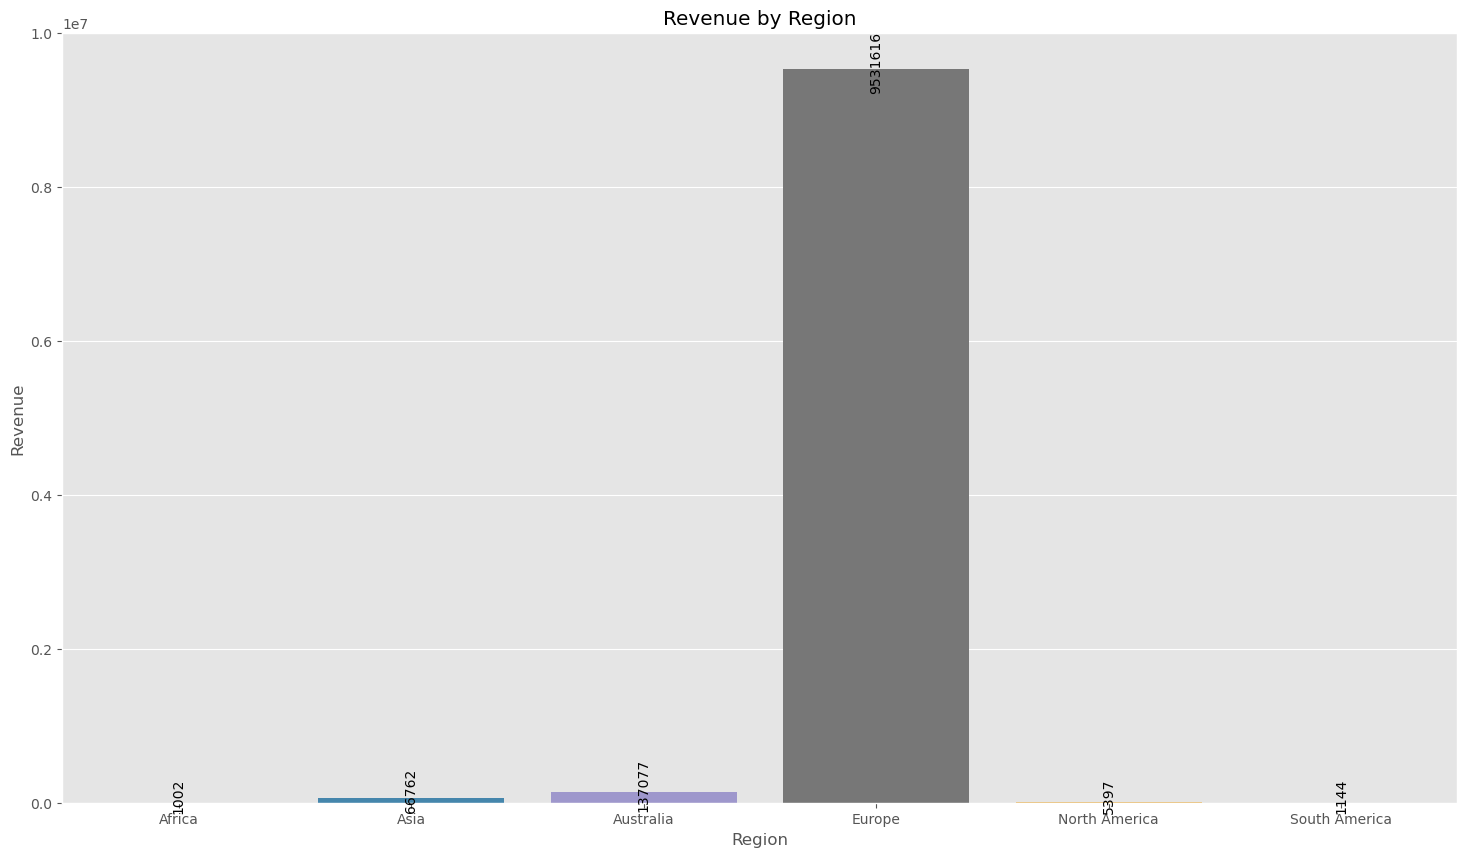

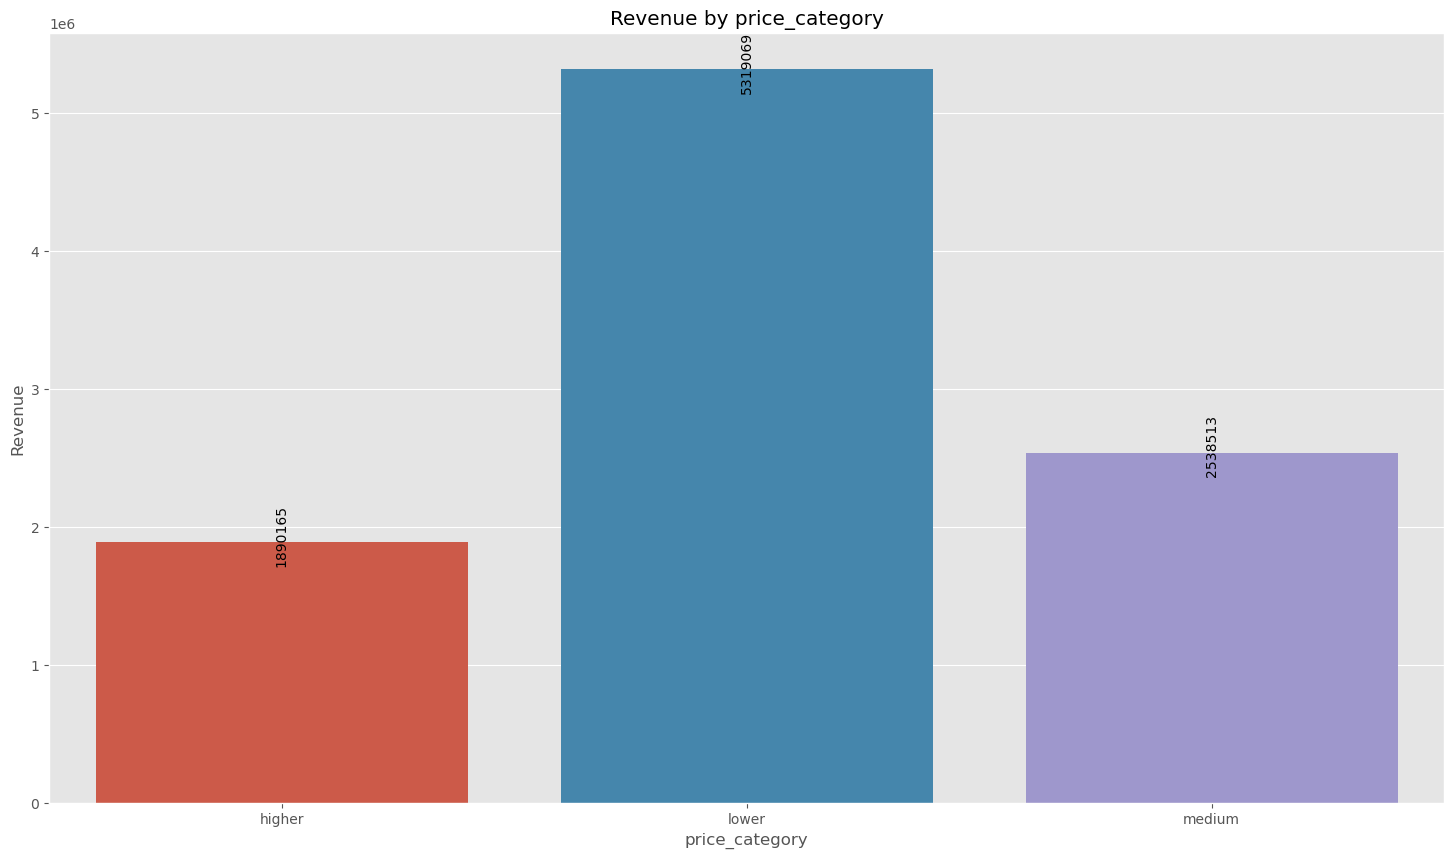

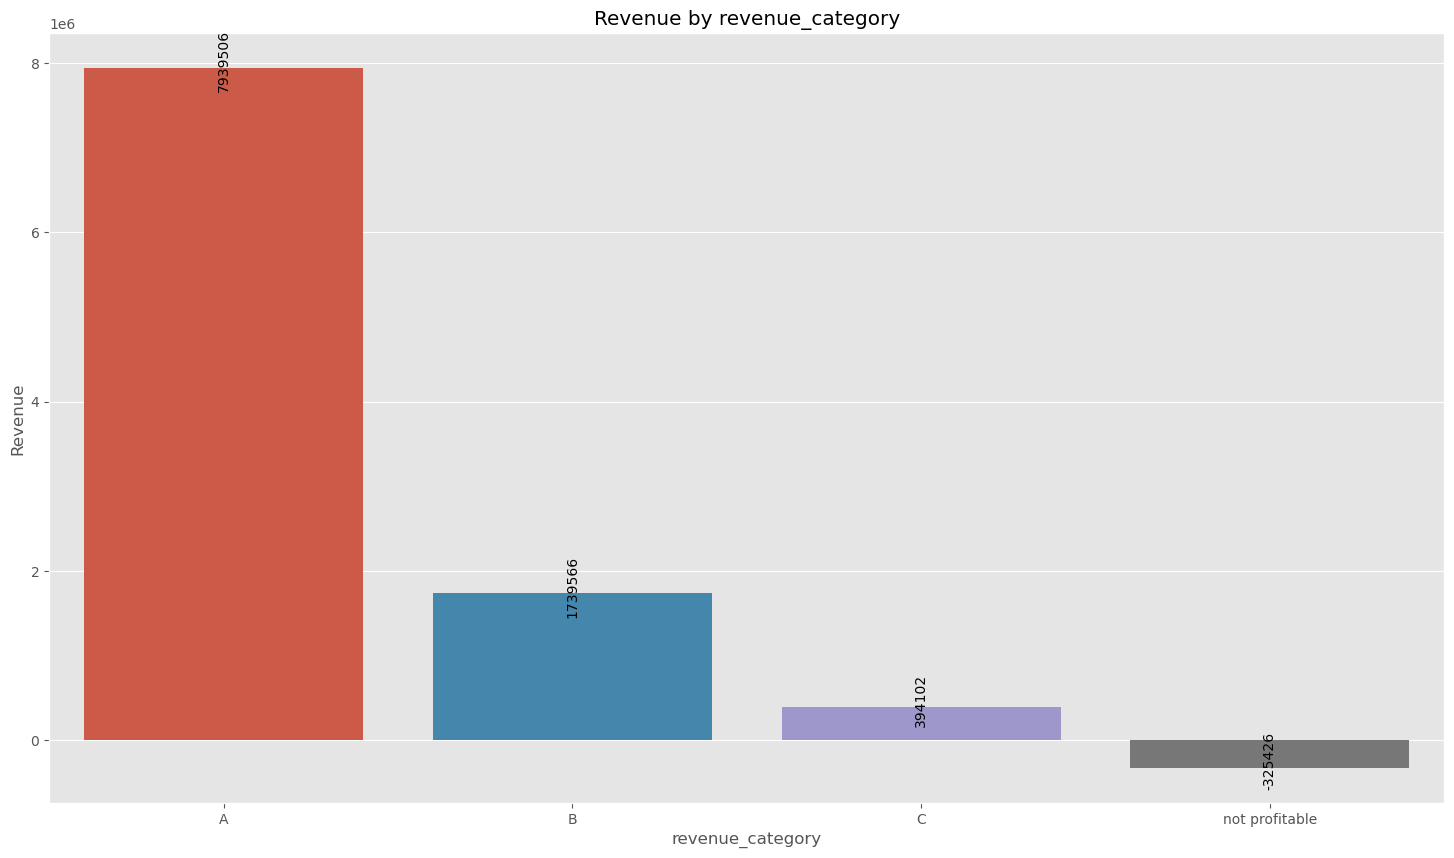

In [29]:
for i in ['Region', 'price_category', 'revenue_category']:
    plt.figure(figsize=(18,10))
    data = df.groupby(i)['Revenue'].sum().reset_index()
    ax = sns.barplot(x=i, y='Revenue', data=data)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points', rotation=90)
    plt.title('Revenue by '+i)
    plt.show()

In [30]:
import datetime as dt

df['days_from_today'] = (dt.datetime.now() - df.InvoiceDate).dt.days

,CustomerID,invoices,last_sale_days,revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,5.075480,4368.855444,1898.459701
std,1722.390705,9.338754,100.770787,8219.345141
min,12346.000000,1.000000,4277.000000,-4287.630000
25%,13812.750000,1.000000,4294.000000,293.362500
50%,15300.500000,3.000000,4327.000000,648.075000
75%,16778.250000,5.000000,4420.000000,1611.725000
max,18287.000000,248.000000,4651.000000,279489.020000


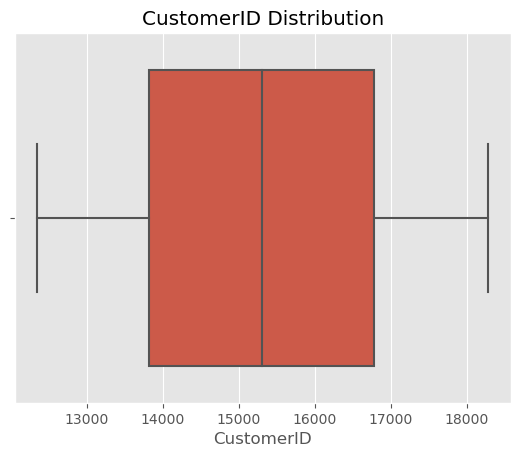

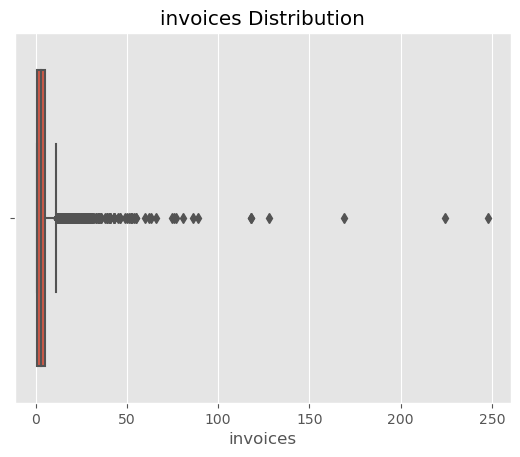

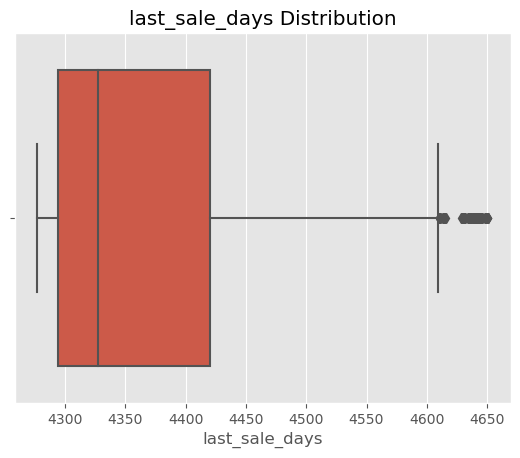

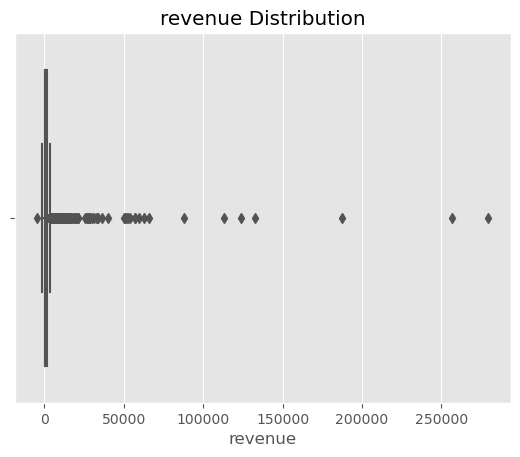

In [31]:
customers = df.dropna(subset='CustomerID').groupby('CustomerID').agg({'InvoiceNo':'nunique', 'days_from_today':'min', 'Revenue': 'sum'}).reset_index()
customers.columns = ['CustomerID', 'invoices', 'last_sale_days', 'revenue']

display(customers.describe())

for col in customers.columns:
    sns.boxplot(x=customers[col])
    plt.title(col + ' Distribution')
    plt.show()

In [32]:
customers['invoices'].rank(method ='first')

0       1314.0
1       3482.0
2       2621.0
3          1.0
4          2.0
         ...  
4367    1312.0
4368    1313.0
4369    2619.0
4370    4159.0
4371    2620.0
Name: invoices, Length: 4372, dtype: float64

In [33]:
bin_labels = [1, 2, 3]

customers['frequency'] = pd.cut(customers['invoices'], bins=[customers.invoices.min()-1, customers.invoices.quantile(0.33), customers.invoices.quantile(0.66), customers.invoices.max()+1], labels=bin_labels).astype('float32')
customers['recency'] = pd.cut(customers['last_sale_days'], bins=[customers.last_sale_days.min()-1, customers.last_sale_days.quantile(0.33), customers.last_sale_days.quantile(0.66), customers.last_sale_days.max()+1], labels=list(reversed(bin_labels))).astype('float32')
customers['monetary'] = pd.cut(customers['revenue'], bins=[customers.revenue.min()-1, customers.revenue.quantile(0.33), customers.revenue.quantile(0.66), customers.revenue.max()+1], labels=bin_labels).astype('float32')

In [34]:
def categorize_customers(x):
    if x>8:
        return 'A'
    elif x>5:
        return 'B'
    else:
        return 'C'

customers['customer_category'] = (customers['frequency'] + customers['recency'] + customers['monetary']).apply(categorize_customers)

customers.customer_category.value_counts()

C    2181
B    1464
A     727
Name: customer_category, dtype: int64

In [35]:
df = df.merge(customers[['CustomerID', 'customer_category']], on='CustomerID', how='left')

In [36]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Description,CustomerID,Revenue,Region,price_category,revenue_category,days_from_today,customer_category
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,15.30,Europe,lower,A,4651,B
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,WHITE METAL LANTERN,17850.0,20.34,Europe,medium,A,4651,B
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850.0,22.00,Europe,medium,A,4651,B
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,20.34,Europe,medium,A,4651,B
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850.0,20.34,Europe,medium,A,4651,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,France,PACK OF 20 SPACEBOY NAPKINS,12680.0,10.20,Europe,lower,B,4277,B
541905,581587,22899,6,2011-12-09 12:50:00,2.10,France,CHILDREN'S APRON DOLLY GIRL,12680.0,12.60,Europe,lower,A,4277,B
541906,581587,23254,4,2011-12-09 12:50:00,4.15,France,CHILDRENS CUTLERY DOLLY GIRL,12680.0,16.60,Europe,medium,A,4277,B
541907,581587,23255,4,2011-12-09 12:50:00,4.15,France,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,16.60,Europe,medium,A,4277,B


# Product Categories Analysis

As we already defined 2 types of product categories, let's visualize the data to get some insights

Text(0.5, 1.0, 'Mean Price by Revenue Category')

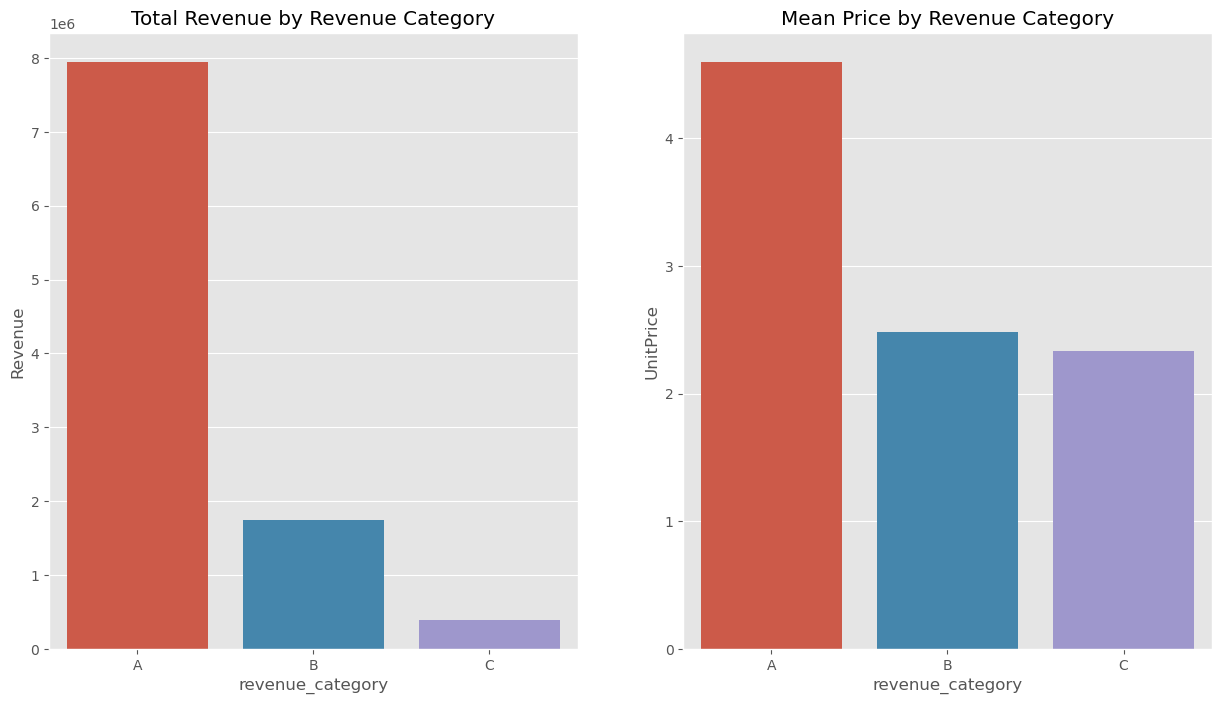

In [37]:
fig, axs = plt.subplots(1,2, figsize =(15,8))

sns.barplot(x = 'revenue_category', y='Revenue', data = df[df['revenue_category']!='not profitable'].groupby('revenue_category')['Revenue'].sum().reset_index(), ax=axs[0])
sns.barplot(x = 'revenue_category', y='UnitPrice', data = df[df['revenue_category']!='not profitable'].groupby('revenue_category')['UnitPrice'].mean().reset_index(), ax=axs[1])
axs[0].set_title('Total Revenue by Revenue Category')
axs[1].set_title('Mean Price by Revenue Category')

Text(0.5, 1.0, 'Mean Price by Price Category')

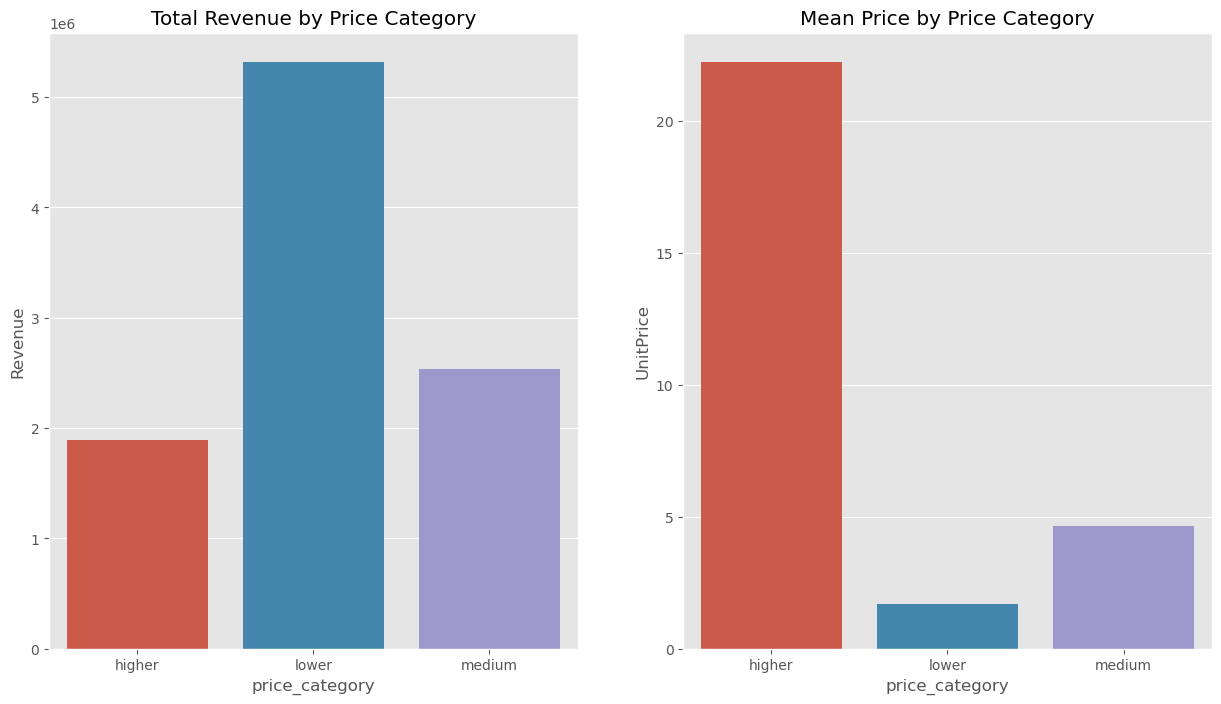

In [38]:
fig, axs = plt.subplots(1,2, figsize =(15,8))

sns.barplot(x = 'price_category', y='Revenue', data = df[df['price_category']!='not profitable'].groupby('price_category')['Revenue'].sum().reset_index(), ax=axs[0])
sns.barplot(x = 'price_category', y='UnitPrice', data = df[df['price_category']!='not profitable'].groupby('price_category')['UnitPrice'].mean().reset_index(), ax=axs[1])
axs[0].set_title('Total Revenue by Price Category')
axs[1].set_title('Mean Price by Price Category')

As we see the items which bring the greatest revenue per unit have the highest average price - so it's a full correlation
Items from lower business segment brings the most revenue to the company - due to the inventory turnover

# Sales and Time Analysis

In [39]:
df['year_month'] = df.InvoiceDate.dt.strftime('%Y/%m')
df['month'] = df.InvoiceDate.dt.month
df['day'] = df.InvoiceDate.dt.day

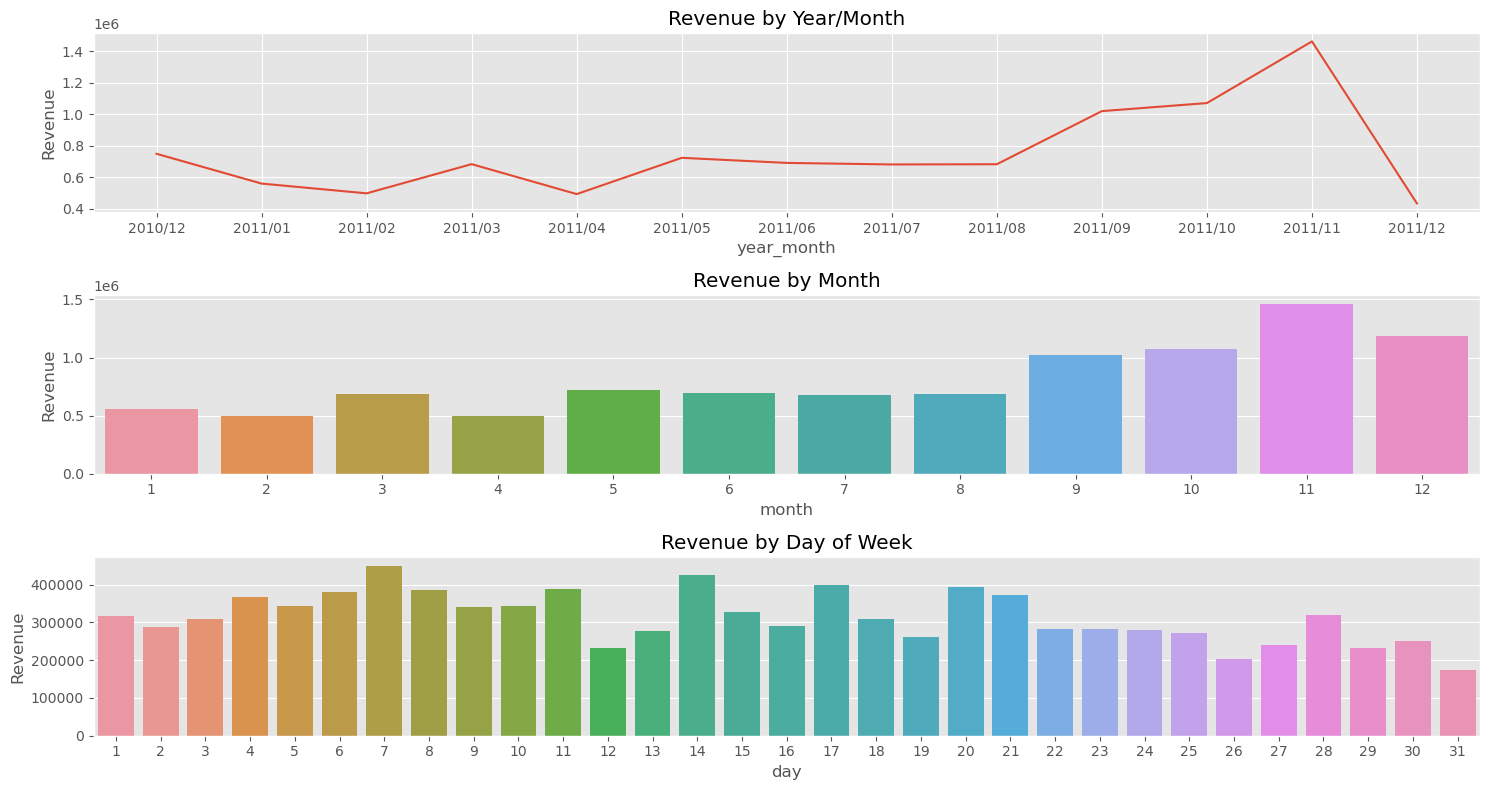

In [40]:
fig, axs = plt.subplots(3,1,figsize=(15,8))

sns.lineplot(x='year_month', y='Revenue', data=df.groupby('year_month')['Revenue'].sum().reset_index(), ax=axs[0])
sns.barplot(x='month', y='Revenue', data=df.groupby('month')['Revenue'].sum().reset_index(), ax=axs[1])
sns.barplot(x='day', y='Revenue', data=df.groupby('day')['Revenue'].sum().reset_index(), ax=axs[2])
axs[0].set_title('Revenue by Year/Month')
axs[1].set_title('Revenue by Month')
axs[2].set_title('Revenue by Day of Week')

plt.tight_layout()

Taking into account there is only 13 months of data - we see the hight season starts in Sept and ends in Nov

Items were getting sold better in the first half of a month on average.

# Geoghraphics Analysis

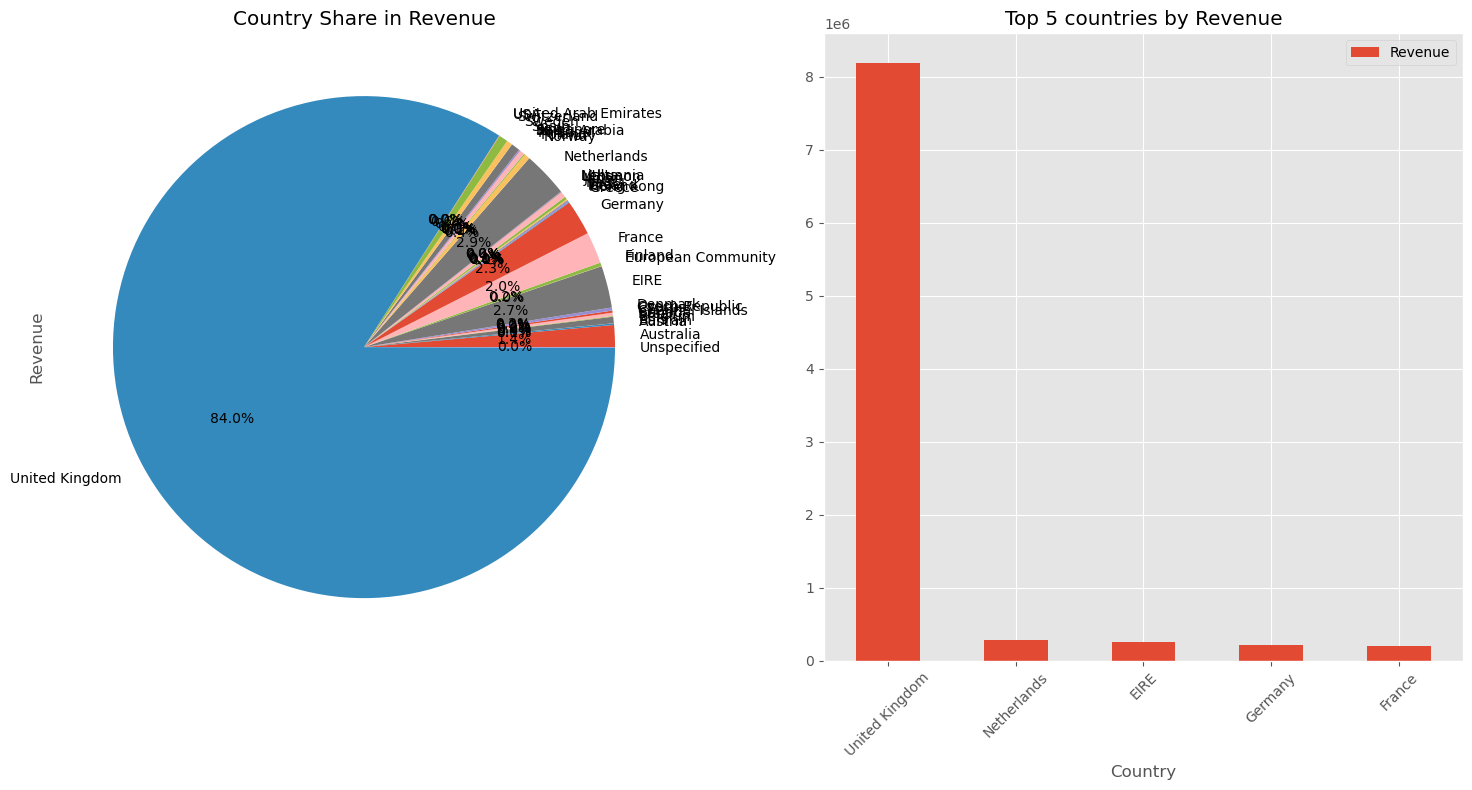

In [92]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
df.groupby('Country')['Revenue'].sum().plot.pie(ax=axs[0], autopct='%1.1f%%')
axs[0].set_title('Country Share in Revenue')
df.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).reset_index().reset_index(drop=True).iloc[:5,:].plot(kind='bar', x='Country', y='Revenue', ax=axs[1])
axs[1].set_title('Top 5 countries by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Mean Unit Price')

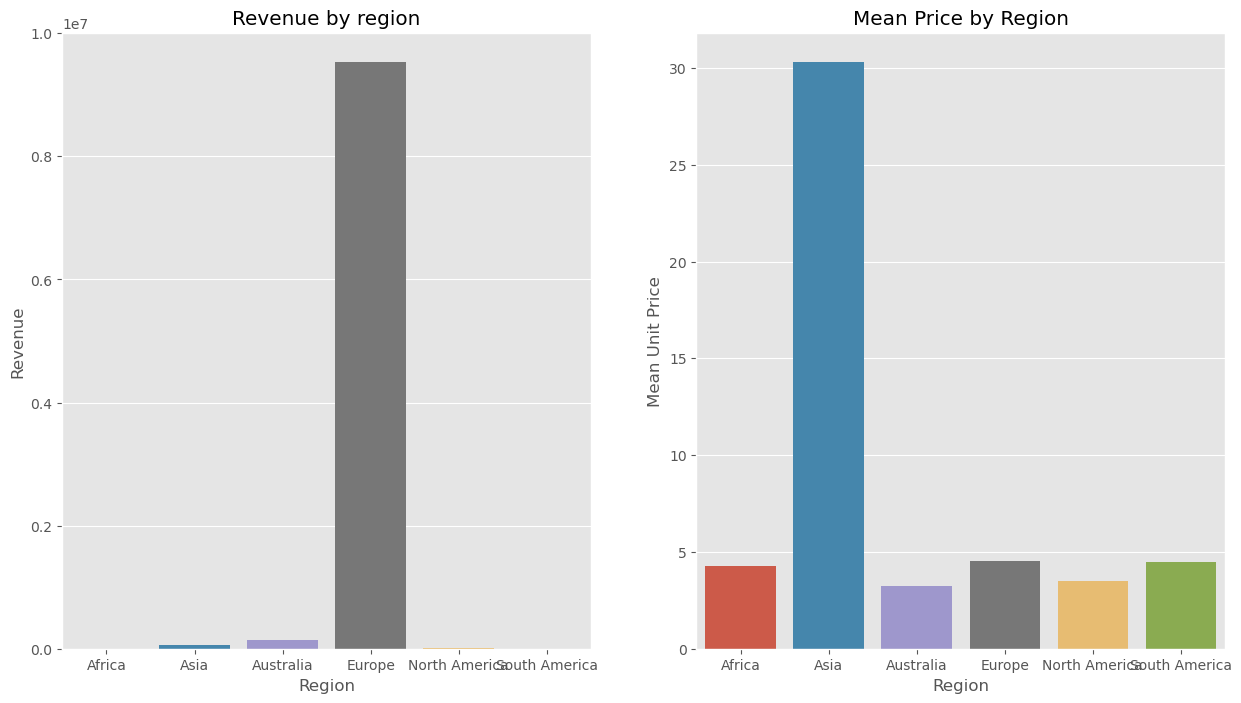

In [96]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
regions_grouped  = df.groupby('Region').agg({'Revenue':'sum', 'UnitPrice':'mean'}).reset_index()
sns.barplot(x='Region', y='Revenue', data = regions_grouped, ax=axs[0])
sns.barplot(x='Region', y='UnitPrice', data = regions_grouped, ax=axs[1])
axs[0].set_title('Revenue by region')
axs[1].set_title('Mean Price by Region')
axs[1].set_ylabel('Mean Unit Price')

We see that Most of the revenue is gained by Europe, and mainly by UK - so we need to stay in that market and make sure to keep that volumes.
Besides that we have NL, IR, GER, and FR - which are close to UK and are top in sales - so we can develop north Europe market as it has potential already and close logistics. However the result is far away from top 1 country which is 84% of the total revenue

Also we see that average unit price is the highest in Asia. It can be because of specific assortment offered on the market or additional costs (logistics, taxes, etc)




# Customers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


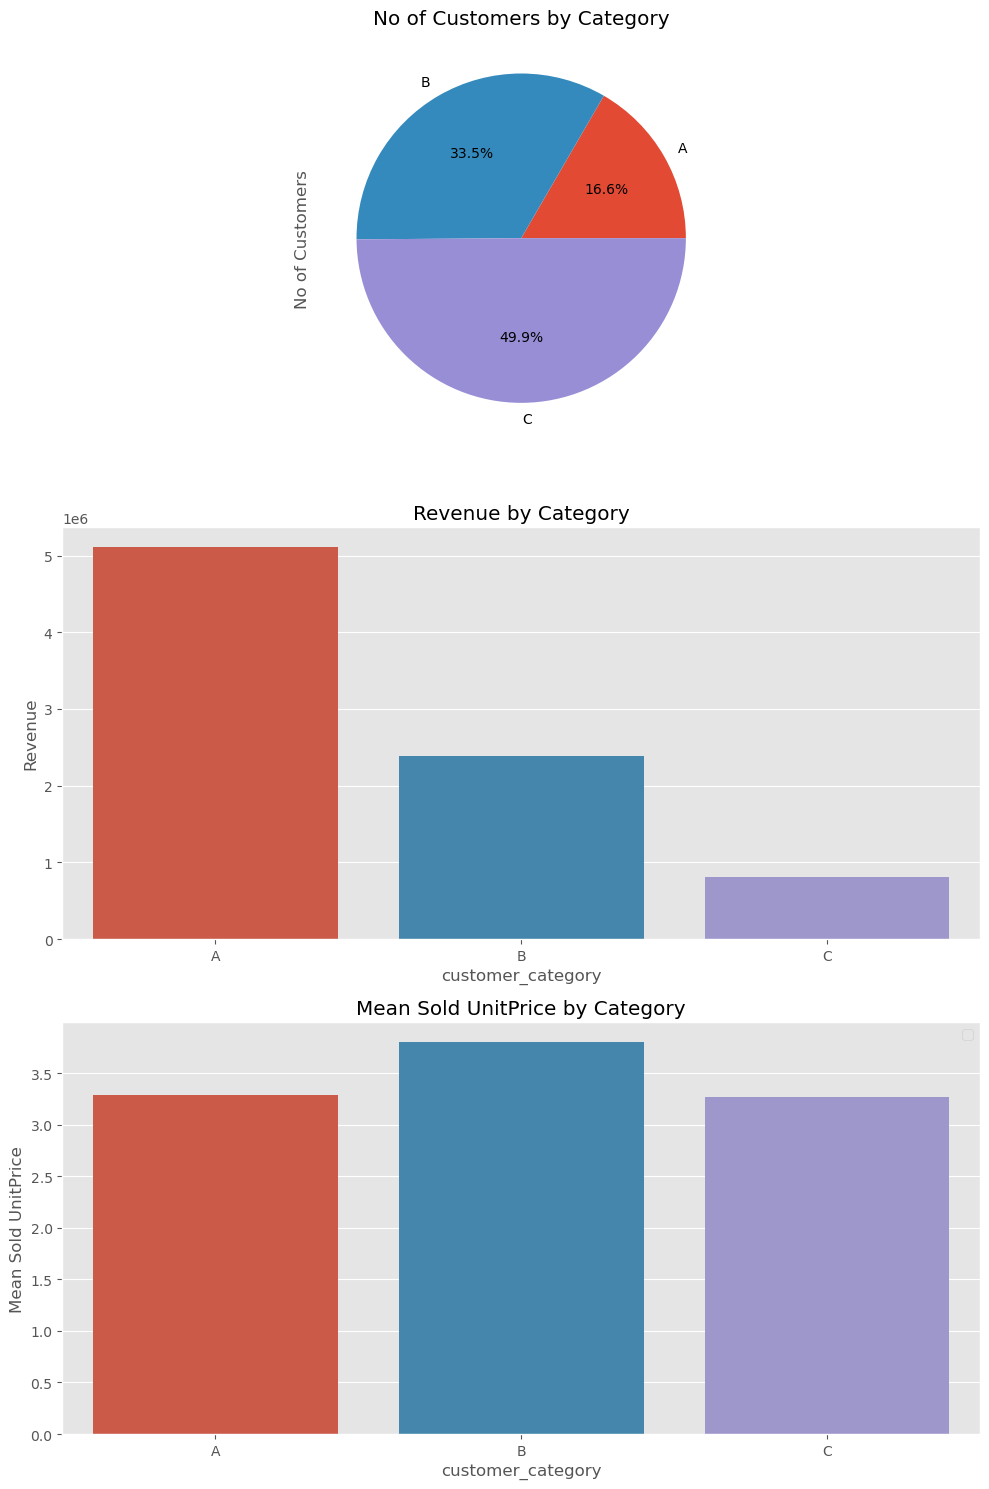

In [123]:
customer_grouped = df.groupby('customer_category').agg({'CustomerID':'nunique', 'Revenue':'sum', 'UnitPrice':'mean'}).reset_index()

fig, axs = plt.subplots(3,1, figsize=(10,15))

axs[0].pie(customer_grouped['CustomerID'], labels=customer_grouped['customer_category'], autopct='%1.1f%%')
sns.barplot(x='customer_category', y='Revenue', data=customer_grouped, ax=axs[1])
sns.barplot(x='customer_category', y='UnitPrice', data=customer_grouped, ax=axs[2])
axs[0].set_title('No of Customers by Category')
axs[0].set_ylabel('No of Customers')
axs[1].set_title('Revenue by Category')
axs[2].set_title('Mean Sold UnitPrice by Category')
axs[2].set_ylabel('Mean Sold UnitPrice')
plt.legend()
plt.tight_layout()

We see that categories are split as 16/33/50. Category A brings the most revenue and most expensive items are sold to category B